In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Reading the credit card dataset downloaded from Kaggle.
#Columns V1-V28 obtained using PCA (Dimensionality Reduction)in order to protect the privacy of the users.

df=pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
#Reduced the number of records for easy computation.
df=df.sample(frac=0.5)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
121097,76070.0,1.143652,0.393947,-0.025862,1.121785,0.190170,-0.484838,0.408096,-0.090352,-0.641865,...,0.105437,0.327180,-0.115585,0.235513,0.714550,-0.282430,0.001698,0.002312,16.44,0
205519,135790.0,1.832984,-0.512154,-0.903046,0.724147,-0.346642,-0.050750,-0.514848,-0.022058,1.386503,...,0.190581,0.855815,-0.046613,0.780769,0.019242,0.841871,-0.015642,-0.006251,86.35,0
153909,100597.0,-0.087807,0.786696,-0.261723,0.914583,1.976742,1.196068,0.887609,0.164417,0.334354,...,0.088797,0.698648,-0.203517,-1.672583,0.064497,-0.292929,0.090049,0.019050,32.03,0
135540,81299.0,1.213120,0.339429,0.287434,0.639180,-0.143195,-0.591736,0.041048,-0.091921,-0.042280,...,-0.254476,-0.677226,0.153054,0.046777,0.159088,0.122527,-0.003559,0.028452,1.98,0
188316,127916.0,-0.459523,0.816390,-2.199609,-1.657170,0.750212,-1.088342,0.756976,-2.040793,-1.175650,...,1.578853,0.479414,0.241393,-0.391820,-1.244766,0.689565,0.570532,0.470872,32.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33312,37184.0,1.181679,-0.333413,-0.186322,-0.011318,1.394107,3.949238,-1.286813,1.084405,0.562801,...,0.211812,0.485058,-0.123265,1.014626,0.523880,-0.241367,0.075992,0.040265,27.24,0
142167,84595.0,-0.860262,0.990817,1.152062,-1.564555,0.057878,-0.136669,0.339992,0.271297,0.203822,...,-0.105606,-0.115298,-0.034492,-0.268637,-0.203670,0.763500,0.400493,0.170264,0.77,0
219099,141598.0,0.484678,-3.289943,-1.605913,-0.164905,-1.539724,-0.284430,0.347372,-0.214474,1.609626,...,0.649064,0.106797,-0.508333,0.749266,-0.637581,0.592208,-0.203830,0.094402,826.00,0
3686,3146.0,-1.102268,0.813856,2.214299,-1.248180,0.159930,0.528457,0.392771,0.030691,0.593573,...,-0.166403,-0.013543,-0.374805,-0.683235,0.238512,0.939451,0.075754,-0.065080,16.56,0


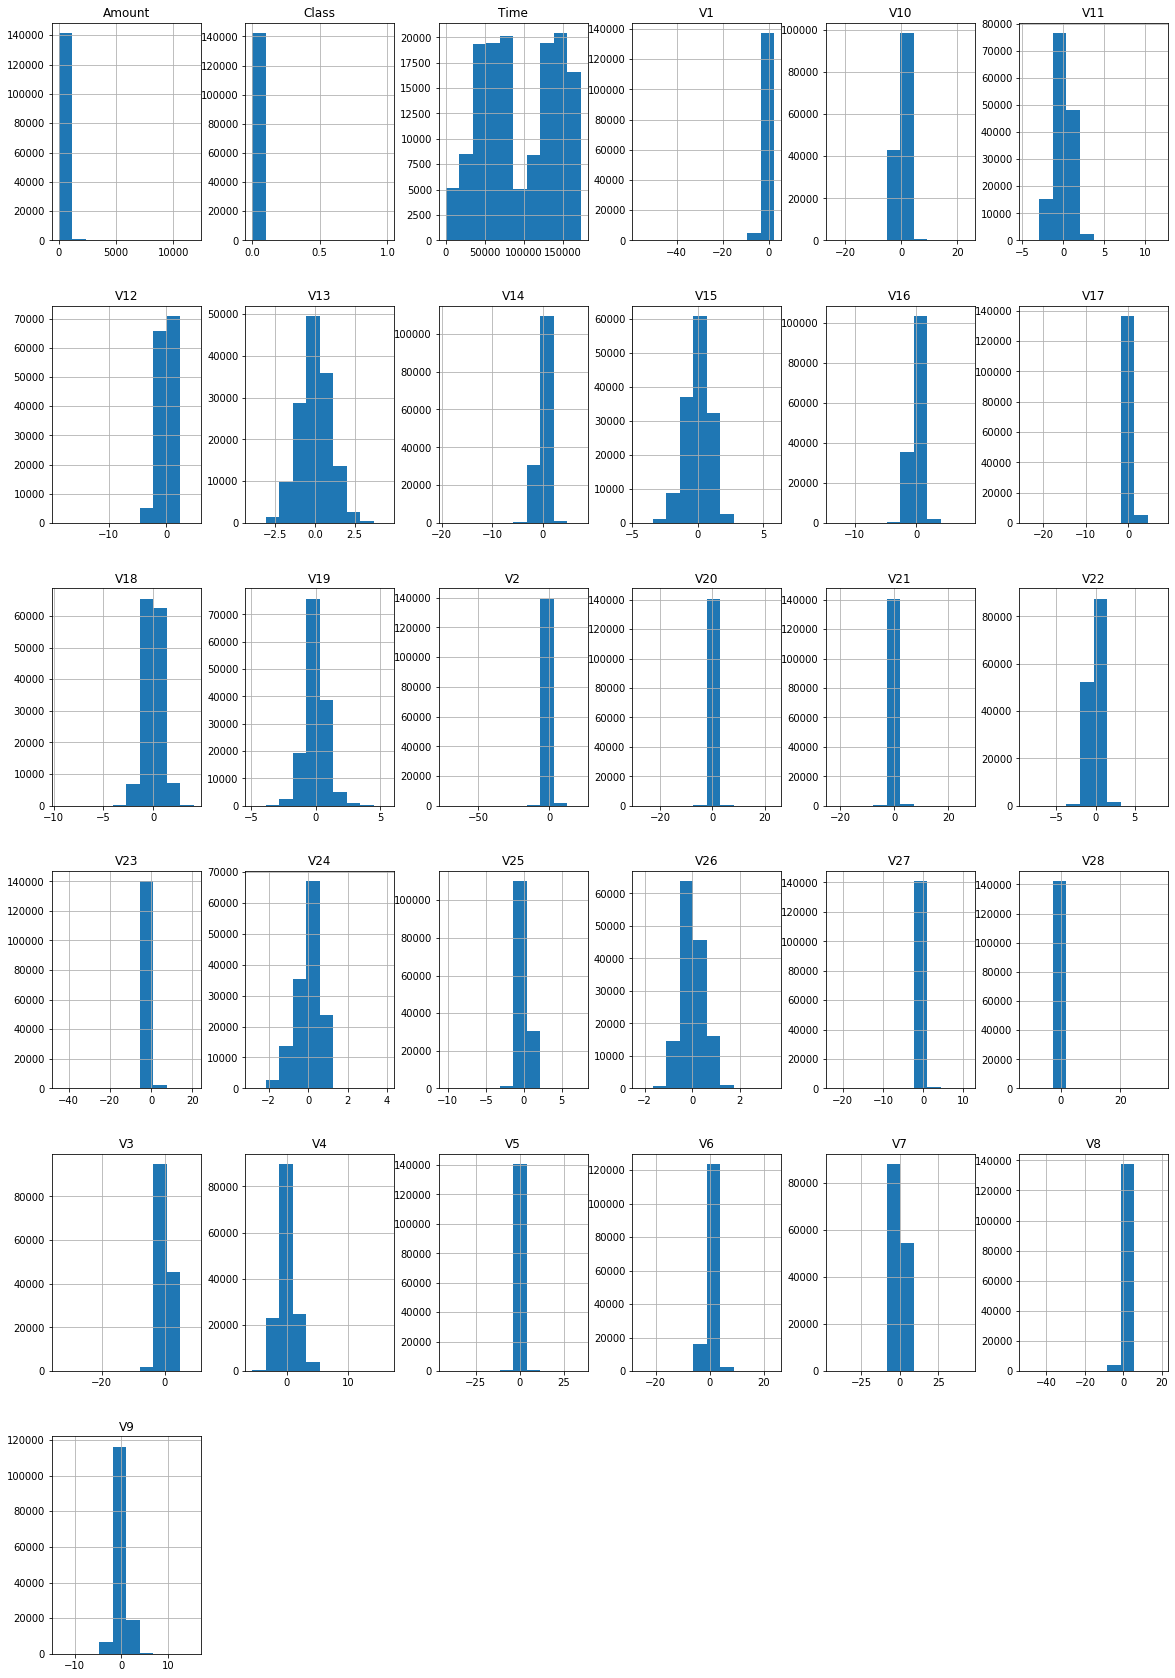

In [5]:
#visualising the histogram of the features.
df.hist(figsize=(20,30))
plt.show()

In [6]:
#calculating the outlier fraction as it is a problem with class imbalance

fraud=df[df['Class']==1]
valid=df[df['Class']==0]
outlier_fraction=len(fraud)/float(len(valid))
outlier_fraction

0.0019207632395466154

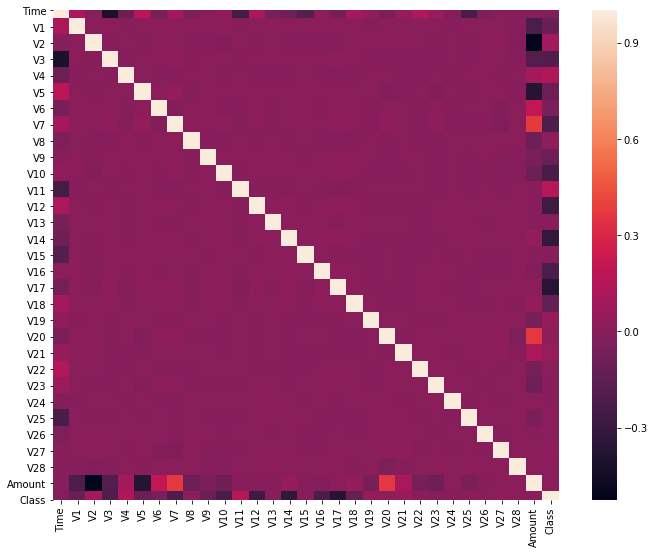

In [7]:
#Visualising the heat map of the correlation matrix of the features
corelate=df.corr()

fig=plt.figure(figsize=(12,9))
#plt.show()
sns.heatmap(corelate,square=True)
plt.show()

In [8]:
#Slicing the dataframe to get input features X and target y
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split

# splitting the X an y for evaluating the model.

X_train,X_test,y_train,y_test=train_test_split(X,y)


In [10]:
#Creating the model using randomforest algorithm

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier().fit(X_train,y_train)
clf

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
#Testing accuracy
test_accuracy=clf.score(X_test,y_test)

#Training accuracy
train_accuracy=clf.score(X_train,y_train)

print(train_accuracy,test_accuracy)


0.9999063696712639 0.9994663071262043


In [12]:
y_pred=clf.predict(X_test)

In [13]:
#Model Evaluation
# 0- Valid class
# 1-Fraud Class

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35538
           1       0.91      0.78      0.84        63

    accuracy                           1.00     35601
   macro avg       0.95      0.89      0.92     35601
weighted avg       1.00      1.00      1.00     35601



In [14]:
confusion_matrix(y_test,y_pred)

array([[35533,     5],
       [   14,    49]], dtype=int64)